In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import seaborn as sns
plt.style.use('seaborn') 

In [2]:
# Define algumas variáveis
pasta_datasets = '../Datasets/'
arquivo_combustiveis_dolar_ipca_estados = 'df_combustiveis_dolar_ipca_estado.csv'
arquivo_combustiveis_dolar_ipca_nacional = 'df_combustiveis_dolar_ipca_nacional.csv'

In [3]:
# Tratando os dados agrupados por estado

In [4]:
# Efetua a leitura do arquivo 'df_combustiveis_dolar_ipca_estado.csv' 

print(pasta_datasets+arquivo_combustiveis_dolar_ipca_estados)
df_combustiveis_dolar_ipca_estados = pd.read_csv(pasta_datasets+arquivo_combustiveis_dolar_ipca_estados,sep = ';',low_memory=False, parse_dates=['Data'],dayfirst = True,encoding='utf-8')

# Cria um novo índice com a coluna 'Data' 
#df_combustiveis_dolar_ipca_estados.set_index(['Data'], inplace=True)

display(df_combustiveis_dolar_ipca_estados)
df_combustiveis_dolar_ipca_estados.info()


../Datasets/df_combustiveis_dolar_ipca_estado.csv


,Data,Regiao,Estado,ValorVendaGasolina,ValorVendaEtanol,CotacaoDolarVenda,Indice_Dez93,Ipca_Mensal
0,2005-01-03,CO,DF,2.252160,1.696821,2.6682,2412.83,0.58
1,2005-01-03,CO,GO,2.362289,1.591160,2.6682,2412.83,0.58
2,2005-01-03,CO,MS,2.542967,1.732000,2.6682,2412.83,0.58
3,2005-01-03,CO,MT,2.740508,1.767554,2.6682,2412.83,0.58
4,2005-01-03,N,AC,2.648780,1.990000,2.6682,2412.83,0.58
...,...,...,...,...,...,...,...,...
70943,2021-12-31,NE,BA,6.750375,5.738000,5.5805,6120.04,0.73
70944,2021-12-31,SE,ES,6.857250,6.146333,5.5805,6120.04,0.73
70945,2021-12-31,SE,MG,6.817750,4.985167,5.5805,6120.04,0.73
70946,2021-12-31,SE,RJ,7.094333,6.056833,5.5805,6120.04,0.73


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70948 entries, 0 to 70947
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Data                70948 non-null  datetime64[ns]
 1   Regiao              70948 non-null  object        
 2   Estado              70948 non-null  object        
 3   ValorVendaGasolina  70948 non-null  float64       
 4   ValorVendaEtanol    70948 non-null  float64       
 5   CotacaoDolarVenda   70948 non-null  float64       
 6   Indice_Dez93        70948 non-null  float64       
 7   Ipca_Mensal         70948 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 4.3+ MB


In [5]:
# Inicialmente iremos fazer uma análise mais macro dos preços dos combustíveis por região, 
# para comparar se há mudanças no comportamento de cada tipo de combustível por região

In [6]:
# Montamos assim um dataset agrupando os preços dos combustíveis por Data e Região

df_combustiveis_regional = pd.DataFrame(df_combustiveis_dolar_ipca_estados.groupby(['Data','Regiao'])
                                                  [['ValorVendaGasolina','ValorVendaEtanol']].mean())

df_combustiveis_regional

ValorVendaGasolina  ValorVendaEtanol
Data       Regiao                                      
2005-01-03 CO                2.474481          1.696884
           N                 2.529295          1.957694
           NE                2.364942          1.768995
           S                 2.398439          1.660713
           SE                2.285507          1.518523
...                               ...               ...
2021-12-30 NE                6.662569          5.405161
           S                 6.463089          5.680784
           SE                6.815443          5.558252
2021-12-31 NE                6.750375          5.738000
           SE                6.730060          5.463958

[16787 rows x 2 columns]

In [7]:
# Agora fazemos um agrupamento por mês, para obtermos o preço médio do combustível por mês em cada região.

df_combustiveis_regional_mensal = df_combustiveis_regional.groupby([(df_combustiveis_regional.index.get_level_values(0).year),
                                                                    (df_combustiveis_regional.index.get_level_values(0).month),
                                                                    df_combustiveis_regional.index.get_level_values(1)]).mean()

df_combustiveis_regional_mensal

ValorVendaGasolina  ValorVendaEtanol
Data Data Regiao                                      
2005 1    CO                2.526642          1.734599
          N                 2.514263          1.931327
          NE                2.354909          1.758235
          S                 2.373654          1.645468
          SE                2.272055          1.502133
...                              ...               ...
2021 12   CO                6.740281          5.237962
          N                 6.813532          6.129920
          NE                6.737205          5.502604
          S                 6.655750          6.076003
          SE                6.848545          5.591891

[1010 rows x 2 columns]

In [8]:
# Ajustamos o nome dos índices Ano e Mes
df_combustiveis_regional_mensal.index.set_names(["Ano", "Mes", "Regiao"], inplace=True)

In [9]:
df_combustiveis_regional_mensal

ValorVendaGasolina  ValorVendaEtanol
Ano  Mes Regiao                                      
2005 1   CO                2.526642          1.734599
         N                 2.514263          1.931327
         NE                2.354909          1.758235
         S                 2.373654          1.645468
         SE                2.272055          1.502133
...                             ...               ...
2021 12  CO                6.740281          5.237962
         N                 6.813532          6.129920
         NE                6.737205          5.502604
         S                 6.655750          6.076003
         SE                6.848545          5.591891

[1010 rows x 2 columns]

In [10]:
# Com o intuito de calcular qual o combustível está compensando colocar, utilizaremos a regra dos 70%, no qual abastecer
# com etanol é mais vantajoso se seu preço custar até 70% do valor da gasolina.

# Assim inicialmente criaremos a coluna Razao, efetuando a divisão do valor do Etanol sobre o da Gasolina

df_combustiveis_regional_mensal['Razao'] = df_combustiveis_regional_mensal.apply(lambda row: row.ValorVendaEtanol 
                                                                                 / row.ValorVendaGasolina, axis=1)

In [11]:
df_combustiveis_regional_mensal

ValorVendaGasolina  ValorVendaEtanol     Razao
Ano  Mes Regiao                                                
2005 1   CO                2.526642          1.734599  0.686524
         N                 2.514263          1.931327  0.768148
         NE                2.354909          1.758235  0.746625
         S                 2.373654          1.645468  0.693222
         SE                2.272055          1.502133  0.661134
...                             ...               ...       ...
2021 12  CO                6.740281          5.237962  0.777113
         N                 6.813532          6.129920  0.899669
         NE                6.737205          5.502604  0.816749
         S                 6.655750          6.076003  0.912895
         SE                6.848545          5.591891  0.816508

[1010 rows x 3 columns]

In [12]:
# Com o resultado da coluna Razao, foi gerada a coluna MelhorOpcao, que retorna qual o combustível mais interessante no momento
# Se o valor na coluna Razao for menor do que 0.7, retorna Etanol. Se for maior, retorna Gasolina

df_combustiveis_regional_mensal['MelhorOpcao'] = df_combustiveis_regional_mensal.apply(lambda row: 'Etanol' if row.Razao < 0.7 
                                                                                       else 'Gasolina', axis=1)

In [13]:
#df_combustiveis_regional_mensal['MelhorOpcao'] = df_combustiveis_regional_mensal.apply(lambda row: '0' if row.Razao < 0.7 
#                                                                                       else '1', axis=1)

In [14]:
df_combustiveis_regional_mensal

ValorVendaGasolina  ValorVendaEtanol     Razao MelhorOpcao
Ano  Mes Regiao                                                            
2005 1   CO                2.526642          1.734599  0.686524      Etanol
         N                 2.514263          1.931327  0.768148    Gasolina
         NE                2.354909          1.758235  0.746625    Gasolina
         S                 2.373654          1.645468  0.693222      Etanol
         SE                2.272055          1.502133  0.661134      Etanol
...                             ...               ...       ...         ...
2021 12  CO                6.740281          5.237962  0.777113    Gasolina
         N                 6.813532          6.129920  0.899669    Gasolina
         NE                6.737205          5.502604  0.816749    Gasolina
         S                 6.655750          6.076003  0.912895    Gasolina
         SE                6.848545          5.591891  0.816508    Gasolina

[1010 rows x 4 columns]

In [15]:
# Verificamos que não há valores nulos

df_combustiveis_regional_mensal.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1010 entries, (2005, 1, 'CO') to (2021, 12, 'SE')
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ValorVendaGasolina  1010 non-null   float64
 1   ValorVendaEtanol    1010 non-null   float64
 2   Razao               1010 non-null   float64
 3   MelhorOpcao         1010 non-null   object 
dtypes: float64(3), object(1)
memory usage: 34.9+ KB


In [16]:
# Resetamos os índices para poder usar a função pivot
df_combustiveis_regional_mensal = df_combustiveis_regional_mensal.reset_index(level=['Ano','Mes','Regiao'])

In [17]:
# Com o intuito de plotar um gráfico, é feito o pivotamento do dataframe df_combustiveis_regional_mensal

In [18]:
df_pivot_combustiveis_mensal = df_combustiveis_regional_mensal.pivot(['Ano','Mes'],'Regiao')

In [19]:
df_pivot_combustiveis_mensal

ValorVendaGasolina                                          \
Regiao                   CO         N        NE         S        SE   
Ano  Mes                                                              
2005 1             2.526642  2.514263  2.354909  2.373654  2.272055   
     2             2.519542  2.533420  2.350443  2.373726  2.274099   
     3             2.473437  2.500132  2.348438  2.387222  2.271912   
     4             2.483554  2.494088  2.351193  2.404252  2.269993   
     5             2.450781  2.507740  2.335485  2.380507  2.246980   
...                     ...       ...       ...       ...       ...   
2021 8             6.133093  6.079026  6.045671  5.888786  6.042116   
     9             6.232982  6.227497  6.207422  5.990860  6.230544   
     10            6.473867  6.390728  6.437144  6.290884  6.508555   
     11            6.878474  6.825792  6.843372  6.727633  6.893417   
     12            6.740281  6.813532  6.737205  6.655750  6.848545   

         ValorVendaEtanol                                             Razao  \
Regiao                 CO         N        NE         S        SE        CO   
Ano  Mes                                                                      
2005 1           1.734599  1.931327  1.758235  1.645468  1.502133  0.686524   
     2           1.722081  1.950681  1.756209  1.648567  1.505901  0.683490   
     3           1.686507  1.922636  1.748829  1.647190  1.467425  0.681848   
     4           1.685107  1.928366  1.731967  1.661916  1.495197  0.678506   
     5           1.652722  1.898948  1.728028  1.590770  1.427250  0.674366   
...                   ...       ...       ...       ...       ...       ...   
2021 8           4.603972  5.342606  5.251873  5.221810  4.732697  0.750677   
     9           4.837082  5.573487  5.401321  5.338706  5.001067  0.776046   
     10          4.982718  5.604210  5.444687  5.558144  5.233846  0.769667   
     11          5.428389  6.033524  5.513127  6.203990  5.755125  0.789185   
     12          5.237962  6.129920  5.502604  6.076003  5.591891  0.777113   

                                                 MelhorOpcao            \
Regiao           N        NE         S        SE          CO         N   
Ano  Mes                                                                 
2005 1    0.768148  0.746625  0.693222  0.661134      Etanol  Gasolina   
     2    0.769979  0.747182  0.694506  0.662197      Etanol  Gasolina   
     3    0.769014  0.744678  0.690003  0.645899      Etanol  Gasolina   
     4    0.773175  0.736633  0.691240  0.658679      Etanol  Gasolina   
     5    0.757235  0.739901  0.668248  0.635186      Etanol  Gasolina   
...            ...       ...       ...       ...         ...       ...   
2021 8    0.878859  0.868700  0.886738  0.783285    Gasolina  Gasolina   
     9    0.894980  0.870139  0.891142  0.802669    Gasolina  Gasolina   
     10   0.876928  0.845823  0.883523  0.804149    Gasolina  Gasolina   
     11   0.883930  0.805616  0.922165  0.834873    Gasolina  Gasolina   
     12   0.899669  0.816749  0.912895  0.816508    Gasolina  Gasolina   

                                        
Regiao          NE         S        SE  
Ano  Mes                                
2005 1    Gasolina    Etanol    Etanol  
     2    Gasolina    Etanol    Etanol  
     3    Gasolina    Etanol    Etanol  
     4    Gasolina    Etanol    Etanol  
     5    Gasolina    Etanol    Etanol  
...            ...       ...       ...  
2021 8    Gasolina  Gasolina  Gasolina  
     9    Gasolina  Gasolina  Gasolina  
     10   Gasolina  Gasolina  Gasolina  
     11   Gasolina  Gasolina  Gasolina  
     12   Gasolina  Gasolina  Gasolina  

[202 rows x 20 columns]

In [20]:
# Para poder utilizar a função plot não é possível utilizar um multi index, então foi gerada a coluna Ano_Mes
df_pivot_combustiveis_mensal['Ano_Mes'] = df_pivot_combustiveis_mensal.apply(lambda row: str(row.name[0]).zfill(4) + '_' + str(row.name[1]).zfill(2), axis=1)

df_pivot_combustiveis_mensal

In [21]:
df_pivot_combustiveis_mensal

ValorVendaGasolina                                          \
Regiao                   CO         N        NE         S        SE   
Ano  Mes                                                              
2005 1             2.526642  2.514263  2.354909  2.373654  2.272055   
     2             2.519542  2.533420  2.350443  2.373726  2.274099   
     3             2.473437  2.500132  2.348438  2.387222  2.271912   
     4             2.483554  2.494088  2.351193  2.404252  2.269993   
     5             2.450781  2.507740  2.335485  2.380507  2.246980   
...                     ...       ...       ...       ...       ...   
2021 8             6.133093  6.079026  6.045671  5.888786  6.042116   
     9             6.232982  6.227497  6.207422  5.990860  6.230544   
     10            6.473867  6.390728  6.437144  6.290884  6.508555   
     11            6.878474  6.825792  6.843372  6.727633  6.893417   
     12            6.740281  6.813532  6.737205  6.655750  6.848545   

         ValorVendaEtanol                                          ...  \
Regiao                 CO         N        NE         S        SE  ...   
Ano  Mes                                                           ...   
2005 1           1.734599  1.931327  1.758235  1.645468  1.502133  ...   
     2           1.722081  1.950681  1.756209  1.648567  1.505901  ...   
     3           1.686507  1.922636  1.748829  1.647190  1.467425  ...   
     4           1.685107  1.928366  1.731967  1.661916  1.495197  ...   
     5           1.652722  1.898948  1.728028  1.590770  1.427250  ...   
...                   ...       ...       ...       ...       ...  ...   
2021 8           4.603972  5.342606  5.251873  5.221810  4.732697  ...   
     9           4.837082  5.573487  5.401321  5.338706  5.001067  ...   
     10          4.982718  5.604210  5.444687  5.558144  5.233846  ...   
     11          5.428389  6.033524  5.513127  6.203990  5.755125  ...   
     12          5.237962  6.129920  5.502604  6.076003  5.591891  ...   

             Razao                               MelhorOpcao            \
Regiao           N        NE         S        SE          CO         N   
Ano  Mes                                                                 
2005 1    0.768148  0.746625  0.693222  0.661134      Etanol  Gasolina   
     2    0.769979  0.747182  0.694506  0.662197      Etanol  Gasolina   
     3    0.769014  0.744678  0.690003  0.645899      Etanol  Gasolina   
     4    0.773175  0.736633  0.691240  0.658679      Etanol  Gasolina   
     5    0.757235  0.739901  0.668248  0.635186      Etanol  Gasolina   
...            ...       ...       ...       ...         ...       ...   
2021 8    0.878859  0.868700  0.886738  0.783285    Gasolina  Gasolina   
     9    0.894980  0.870139  0.891142  0.802669    Gasolina  Gasolina   
     10   0.876928  0.845823  0.883523  0.804149    Gasolina  Gasolina   
     11   0.883930  0.805616  0.922165  0.834873    Gasolina  Gasolina   
     12   0.899669  0.816749  0.912895  0.816508    Gasolina  Gasolina   

                                        Ano_Mes  
Regiao          NE         S        SE           
Ano  Mes                                         
2005 1    Gasolina    Etanol    Etanol  2005_01  
     2    Gasolina    Etanol    Etanol  2005_02  
     3    Gasolina    Etanol    Etanol  2005_03  
     4    Gasolina    Etanol    Etanol  2005_04  
     5    Gasolina    Etanol    Etanol  2005_05  
...            ...       ...       ...      ...  
2021 8    Gasolina  Gasolina  Gasolina  2021_08  
     9    Gasolina  Gasolina  Gasolina  2021_09  
     10   Gasolina  Gasolina  Gasolina  2021_10  
     11   Gasolina  Gasolina  Gasolina  2021_11  
     12   Gasolina  Gasolina  Gasolina  2021_12  

[202 rows x 21 columns]

In [22]:
df_pivot_combustiveis_mensal = df_pivot_combustiveis_mensal.reset_index(level=['Ano','Mes'])

In [23]:
df_pivot_combustiveis_mensal

Ano Mes ValorVendaGasolina                                          \
Regiao                           CO         N        NE         S        SE   
0       2005   1           2.526642  2.514263  2.354909  2.373654  2.272055   
1       2005   2           2.519542  2.533420  2.350443  2.373726  2.274099   
2       2005   3           2.473437  2.500132  2.348438  2.387222  2.271912   
3       2005   4           2.483554  2.494088  2.351193  2.404252  2.269993   
4       2005   5           2.450781  2.507740  2.335485  2.380507  2.246980   
..       ...  ..                ...       ...       ...       ...       ...   
197     2021   8           6.133093  6.079026  6.045671  5.888786  6.042116   
198     2021   9           6.232982  6.227497  6.207422  5.990860  6.230544   
199     2021  10           6.473867  6.390728  6.437144  6.290884  6.508555   
200     2021  11           6.878474  6.825792  6.843372  6.727633  6.893417   
201     2021  12           6.740281  6.813532  6.737205  6.655750  6.848545   

       ValorVendaEtanol                      ...     Razao            \
Regiao               CO         N        NE  ...         N        NE   
0              1.734599  1.931327  1.758235  ...  0.768148  0.746625   
1              1.722081  1.950681  1.756209  ...  0.769979  0.747182   
2              1.686507  1.922636  1.748829  ...  0.769014  0.744678   
3              1.685107  1.928366  1.731967  ...  0.773175  0.736633   
4              1.652722  1.898948  1.728028  ...  0.757235  0.739901   
..                  ...       ...       ...  ...       ...       ...   
197            4.603972  5.342606  5.251873  ...  0.878859  0.868700   
198            4.837082  5.573487  5.401321  ...  0.894980  0.870139   
199            4.982718  5.604210  5.444687  ...  0.876928  0.845823   
200            5.428389  6.033524  5.513127  ...  0.883930  0.805616   
201            5.237962  6.129920  5.502604  ...  0.899669  0.816749   

                           MelhorOpcao                                \
Regiao         S        SE          CO         N        NE         S   
0       0.693222  0.661134      Etanol  Gasolina  Gasolina    Etanol   
1       0.694506  0.662197      Etanol  Gasolina  Gasolina    Etanol   
2       0.690003  0.645899      Etanol  Gasolina  Gasolina    Etanol   
3       0.691240  0.658679      Etanol  Gasolina  Gasolina    Etanol   
4       0.668248  0.635186      Etanol  Gasolina  Gasolina    Etanol   
..           ...       ...         ...       ...       ...       ...   
197     0.886738  0.783285    Gasolina  Gasolina  Gasolina  Gasolina   
198     0.891142  0.802669    Gasolina  Gasolina  Gasolina  Gasolina   
199     0.883523  0.804149    Gasolina  Gasolina  Gasolina  Gasolina   
200     0.922165  0.834873    Gasolina  Gasolina  Gasolina  Gasolina   
201     0.912895  0.816508    Gasolina  Gasolina  Gasolina  Gasolina   

                  Ano_Mes  
Regiao        SE           
0         Etanol  2005_01  
1         Etanol  2005_02  
2         Etanol  2005_03  
3         Etanol  2005_04  
4         Etanol  2005_05  
..           ...      ...  
197     Gasolina  2021_08  
198     Gasolina  2021_09  
199     Gasolina  2021_10  
200     Gasolina  2021_11  
201     Gasolina  2021_12  

[202 rows x 23 columns]

In [24]:
df_pivot_combustiveis_mensal.set_index(['Ano_Mes'], inplace=True)

In [25]:
df_pivot_combustiveis_mensal

Ano Mes ValorVendaGasolina                                          \
Regiao                            CO         N        NE         S        SE   
Ano_Mes                                                                        
2005_01  2005   1           2.526642  2.514263  2.354909  2.373654  2.272055   
2005_02  2005   2           2.519542  2.533420  2.350443  2.373726  2.274099   
2005_03  2005   3           2.473437  2.500132  2.348438  2.387222  2.271912   
2005_04  2005   4           2.483554  2.494088  2.351193  2.404252  2.269993   
2005_05  2005   5           2.450781  2.507740  2.335485  2.380507  2.246980   
...       ...  ..                ...       ...       ...       ...       ...   
2021_08  2021   8           6.133093  6.079026  6.045671  5.888786  6.042116   
2021_09  2021   9           6.232982  6.227497  6.207422  5.990860  6.230544   
2021_10  2021  10           6.473867  6.390728  6.437144  6.290884  6.508555   
2021_11  2021  11           6.878474  6.825792  6.843372  6.727633  6.893417   
2021_12  2021  12           6.740281  6.813532  6.737205  6.655750  6.848545   

        ValorVendaEtanol                      ...     Razao            \
Regiao                CO         N        NE  ...        CO         N   
Ano_Mes                                       ...                       
2005_01         1.734599  1.931327  1.758235  ...  0.686524  0.768148   
2005_02         1.722081  1.950681  1.756209  ...  0.683490  0.769979   
2005_03         1.686507  1.922636  1.748829  ...  0.681848  0.769014   
2005_04         1.685107  1.928366  1.731967  ...  0.678506  0.773175   
2005_05         1.652722  1.898948  1.728028  ...  0.674366  0.757235   
...                  ...       ...       ...  ...       ...       ...   
2021_08         4.603972  5.342606  5.251873  ...  0.750677  0.878859   
2021_09         4.837082  5.573487  5.401321  ...  0.776046  0.894980   
2021_10         4.982718  5.604210  5.444687  ...  0.769667  0.876928   
2021_11         5.428389  6.033524  5.513127  ...  0.789185  0.883930   
2021_12         5.237962  6.129920  5.502604  ...  0.777113  0.899669   

                                      MelhorOpcao                      \
Regiao         NE         S        SE          CO         N        NE   
Ano_Mes                                                                 
2005_01  0.746625  0.693222  0.661134      Etanol  Gasolina  Gasolina   
2005_02  0.747182  0.694506  0.662197      Etanol  Gasolina  Gasolina   
2005_03  0.744678  0.690003  0.645899      Etanol  Gasolina  Gasolina   
2005_04  0.736633  0.691240  0.658679      Etanol  Gasolina  Gasolina   
2005_05  0.739901  0.668248  0.635186      Etanol  Gasolina  Gasolina   
...           ...       ...       ...         ...       ...       ...   
2021_08  0.868700  0.886738  0.783285    Gasolina  Gasolina  Gasolina   
2021_09  0.870139  0.891142  0.802669    Gasolina  Gasolina  Gasolina   
2021_10  0.845823  0.883523  0.804149    Gasolina  Gasolina  Gasolina   
2021_11  0.805616  0.922165  0.834873    Gasolina  Gasolina  Gasolina   
2021_12  0.816749  0.912895  0.816508    Gasolina  Gasolina  Gasolina   

                             
Regiao          S        SE  
Ano_Mes                      
2005_01    Etanol    Etanol  
2005_02    Etanol    Etanol  
2005_03    Etanol    Etanol  
2005_04    Etanol    Etanol  
2005_05    Etanol    Etanol  
...           ...       ...  
2021_08  Gasolina  Gasolina  
2021_09  Gasolina  Gasolina  
2021_10  Gasolina  Gasolina  
2021_11  Gasolina  Gasolina  
2021_12  Gasolina  Gasolina  

[202 rows x 22 columns]

<AxesSubplot:xlabel='Ano_Mes'>

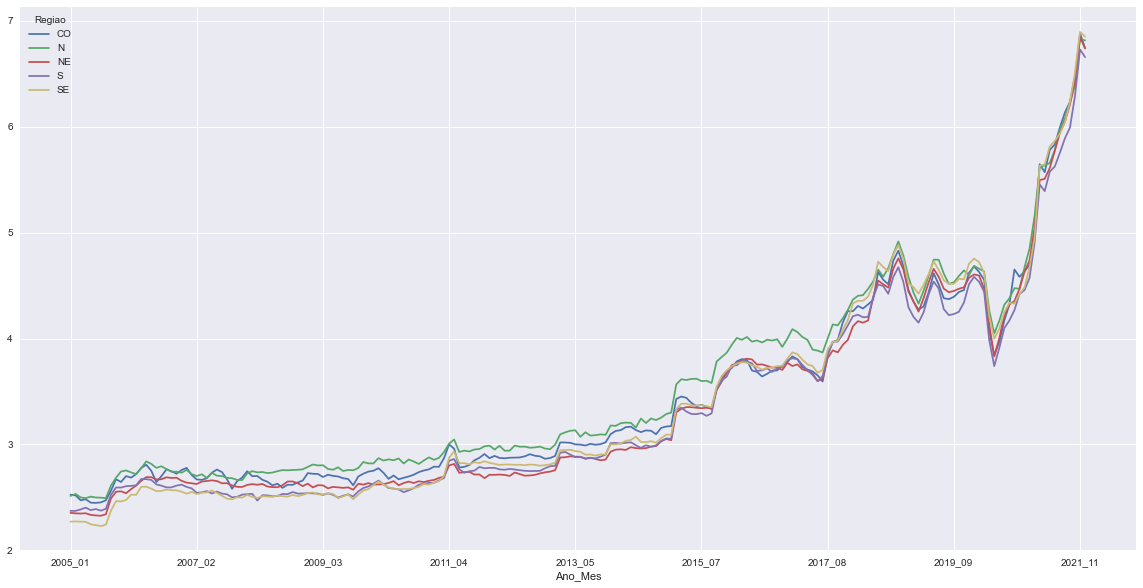

In [26]:
# Preço da Gasolina por região
df_pivot_combustiveis_mensal['ValorVendaGasolina'].plot(figsize=(20,10))

<AxesSubplot:xlabel='Ano_Mes'>

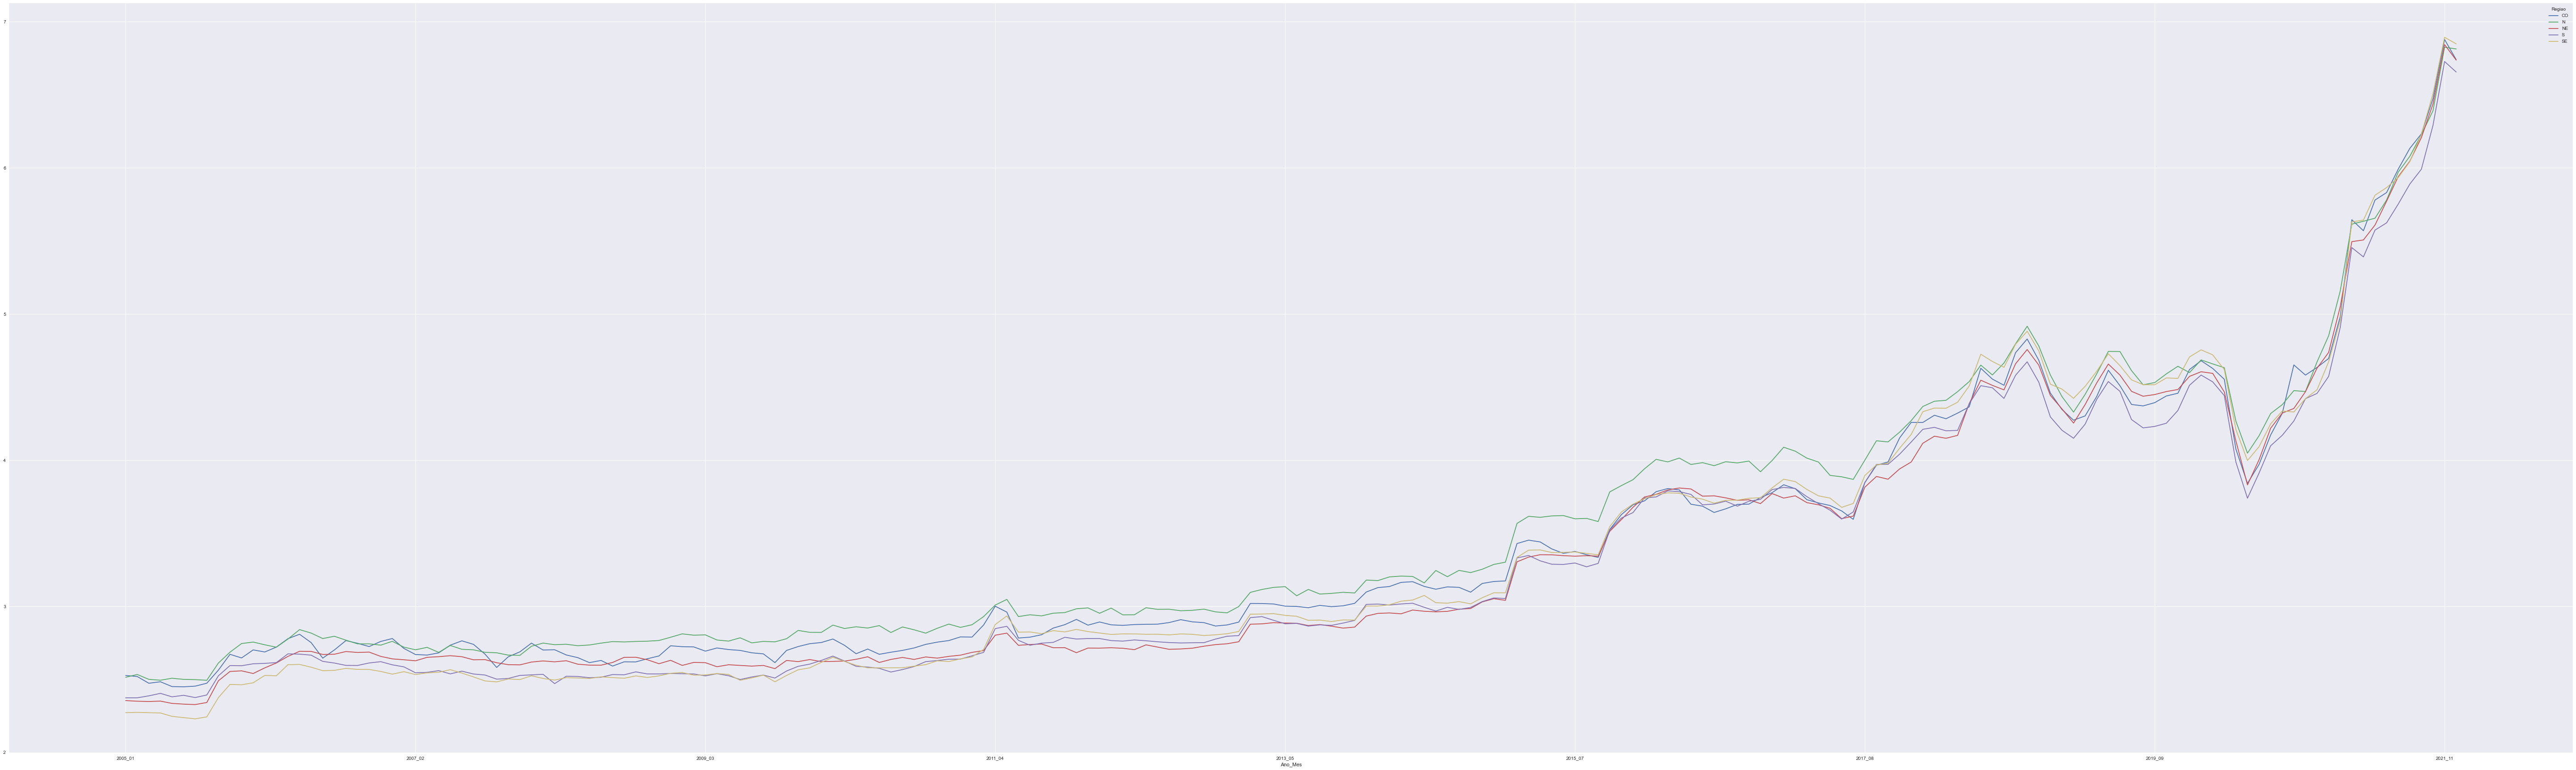

In [27]:
# TAMANHO MAIOR

# Preço da Gasolina por região
df_pivot_combustiveis_mensal['ValorVendaGasolina'].plot(figsize=(100,30))

<AxesSubplot:xlabel='Ano_Mes'>

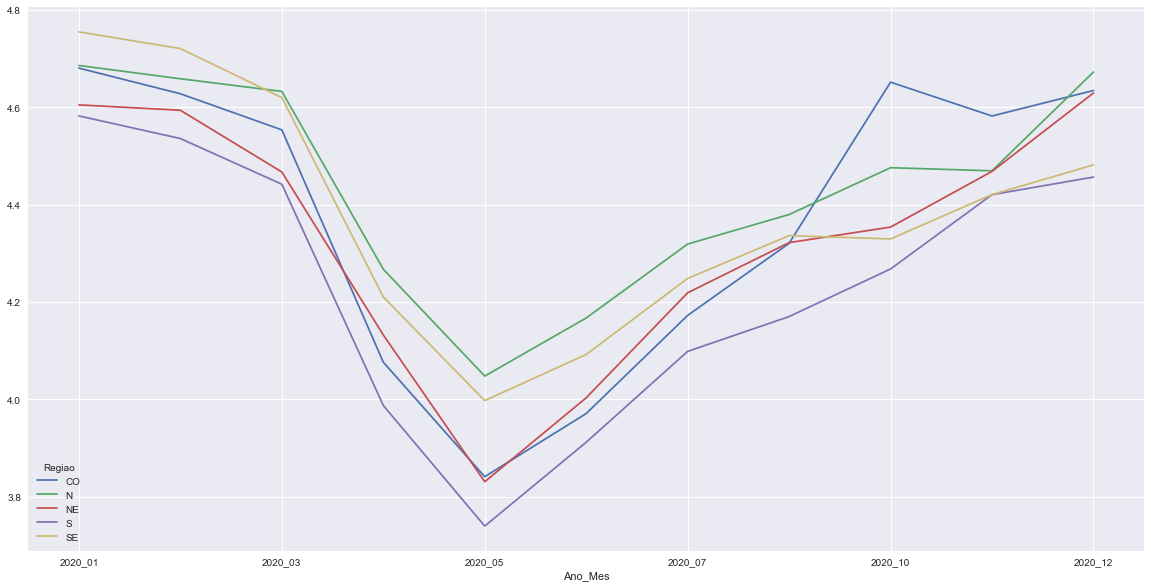

In [28]:
# Destaque 2020 - Gasolina

df_pivot_combustiveis_mensal['2020_01':'2020_12']['ValorVendaGasolina'].plot(figsize=(20,10))

<AxesSubplot:xlabel='Ano_Mes'>

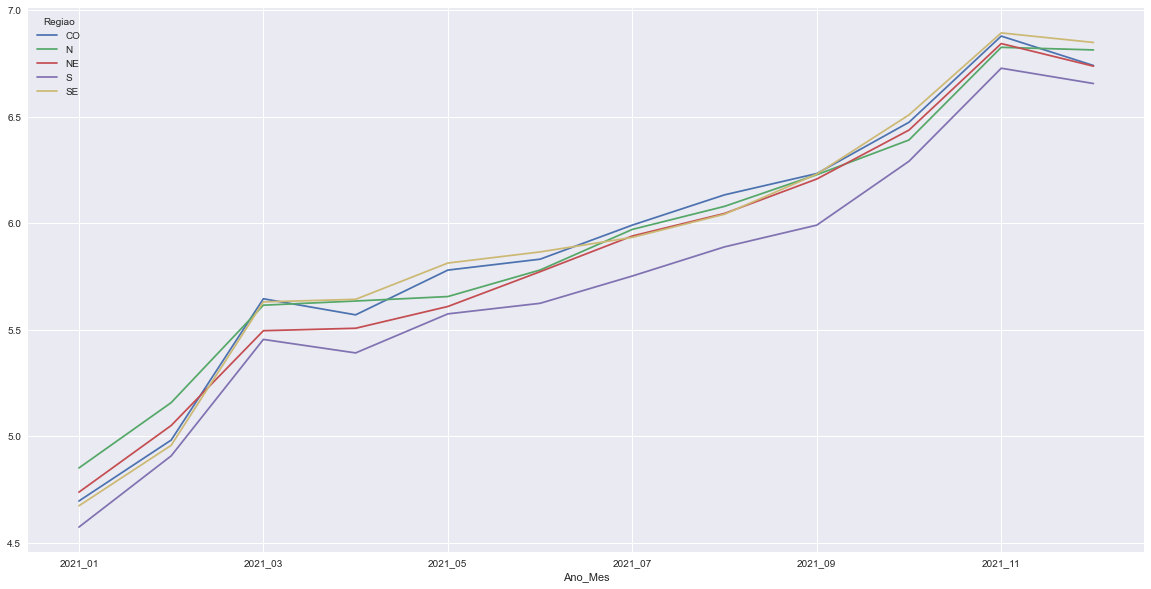

In [29]:
# Destaque 2021 - Gasolina

df_pivot_combustiveis_mensal['2021_01':'2021_12']['ValorVendaGasolina'].plot(figsize=(20,10))

<AxesSubplot:xlabel='Ano_Mes'>

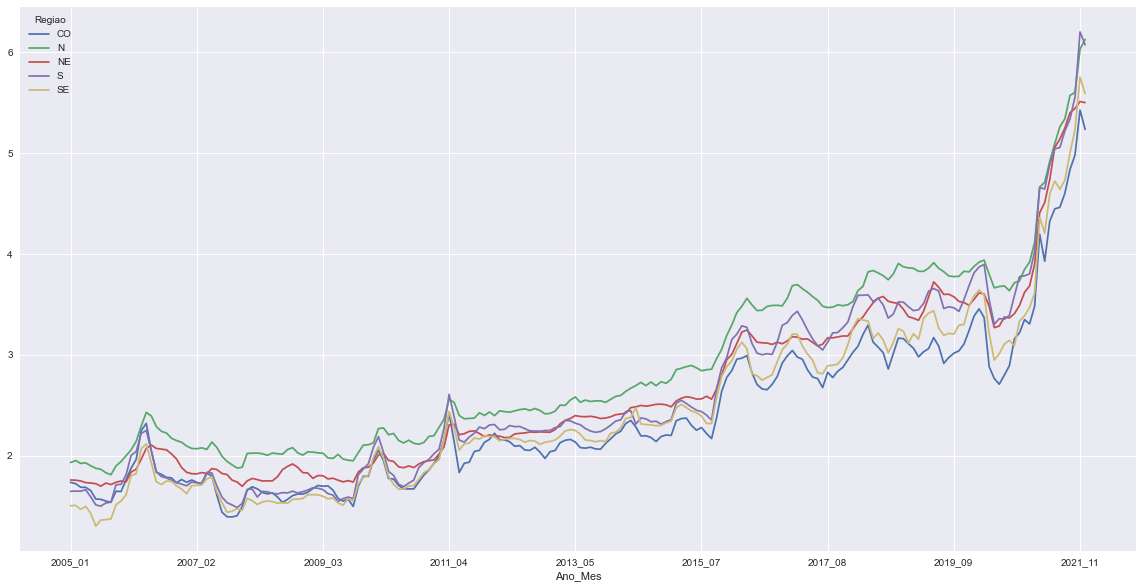

In [30]:
# Preço do Etanol por região
df_pivot_combustiveis_mensal['ValorVendaEtanol'].plot(figsize=(20,10))

<AxesSubplot:xlabel='Ano_Mes'>

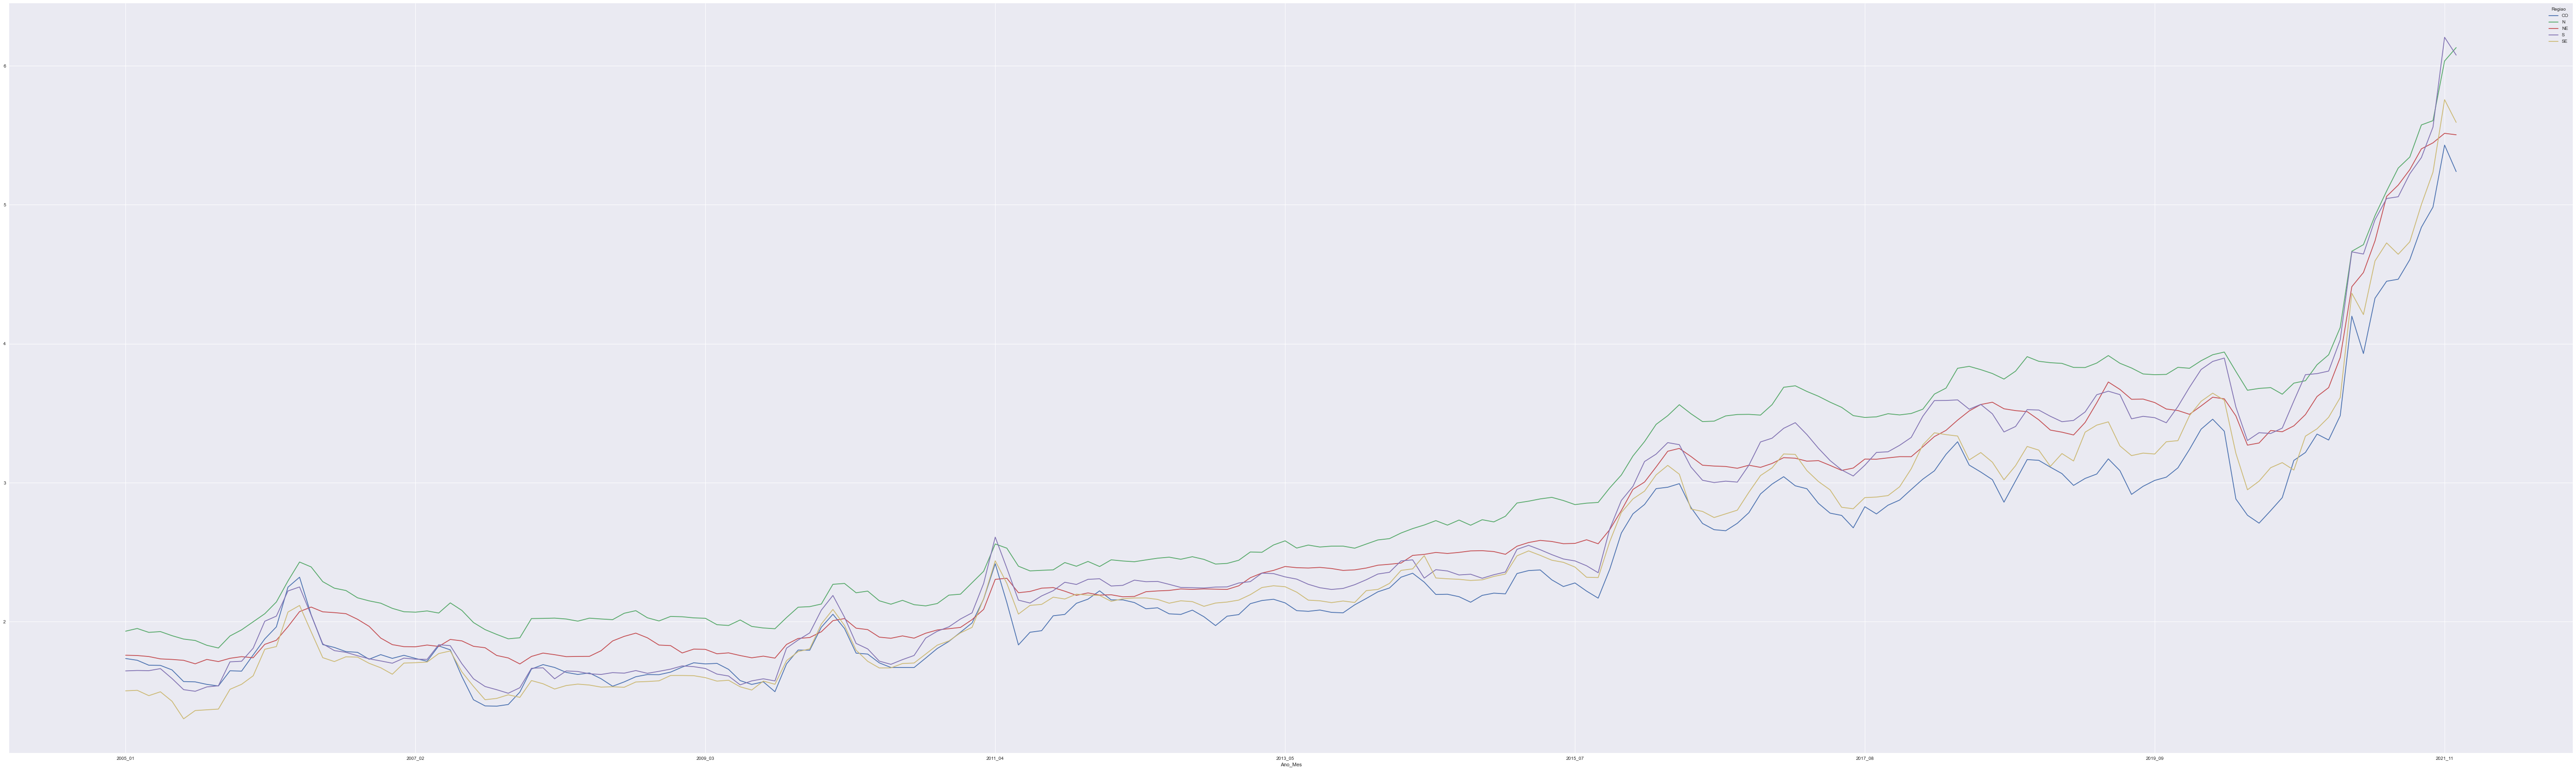

In [31]:
# TAMANHO MAIOR

# Preço do Etanol por região
df_pivot_combustiveis_mensal['ValorVendaEtanol'].plot(figsize=(100,30))

<AxesSubplot:xlabel='Ano_Mes'>

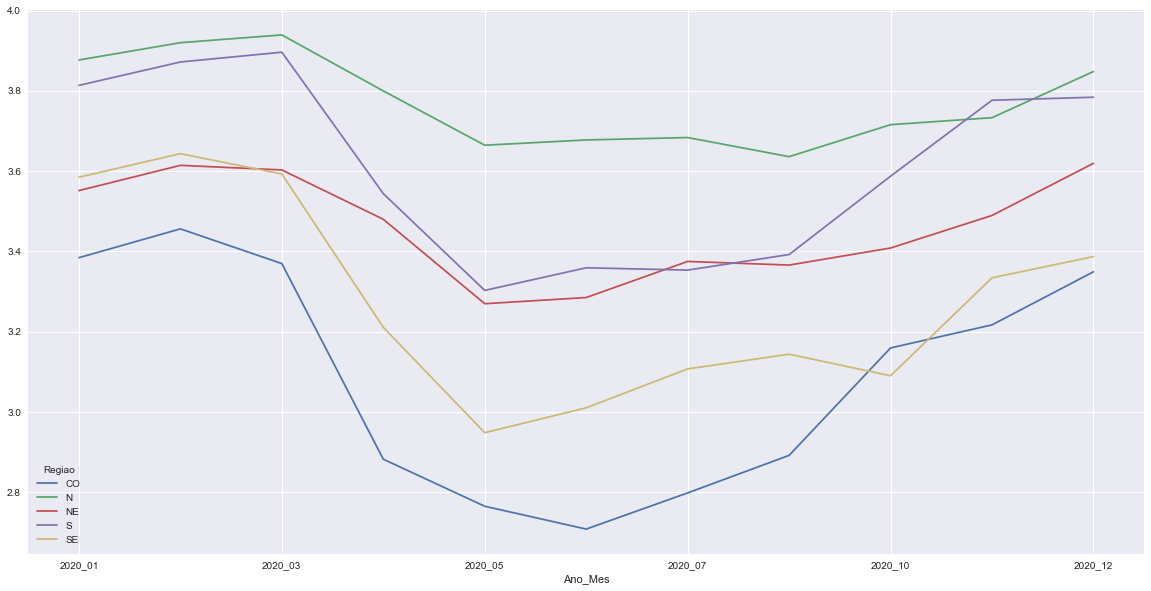

In [32]:
# Destaque 2020 - Etanol

df_pivot_combustiveis_mensal['2020_01':'2020_12']['ValorVendaEtanol'].plot(figsize=(20,10))

<AxesSubplot:xlabel='Ano_Mes'>

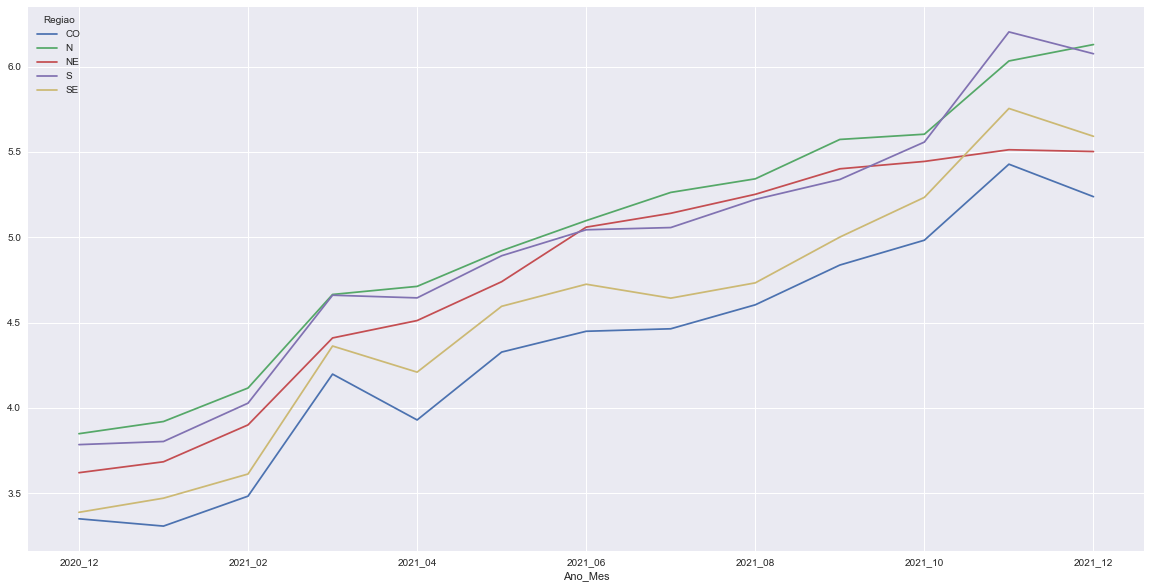

In [33]:
# Destaque 2021 - Etanol

df_pivot_combustiveis_mensal['2020_12':'2021_12']['ValorVendaEtanol'].plot(figsize=(20,10))

In [34]:
df_pivot_combustiveis_mensal['MelhorOpcao']

Regiao,CO,N,NE,S,SE
Ano_Mes,,,,,
2005_01,Etanol,Gasolina,Gasolina,Etanol,Etanol
2005_02,Etanol,Gasolina,Gasolina,Etanol,Etanol
2005_03,Etanol,Gasolina,Gasolina,Etanol,Etanol
2005_04,Etanol,Gasolina,Gasolina,Etanol,Etanol
2005_05,Etanol,Gasolina,Gasolina,Etanol,Etanol
...,...,...,...,...,...
2021_08,Gasolina,Gasolina,Gasolina,Gasolina,Gasolina
2021_09,Gasolina,Gasolina,Gasolina,Gasolina,Gasolina
2021_10,Gasolina,Gasolina,Gasolina,Gasolina,Gasolina


In [35]:
# Exporta o dataset para um arquivo CSV
df_pivot_combustiveis_mensal['MelhorOpcao'].to_csv(pasta_datasets + 'melhorOpcao.csv', sep = ';',index=True)

In [36]:
# Tratando os dados agrupados nacionalmente

In [37]:
# Efetua a leitura do arquivo 'combustiveis_dolar_ipca_nacional.csv' 

print(pasta_datasets+arquivo_combustiveis_dolar_ipca_nacional)
df_combustiveis_dolar_ipca_nacional  =  pd.read_csv(pasta_datasets+arquivo_combustiveis_dolar_ipca_nacional,sep = ';',low_memory=False, parse_dates=['Data'],dayfirst = True,encoding='utf-8')

# Cria um novo índice com a coluna 'Data' 
df_combustiveis_dolar_ipca_nacional.set_index(['Data'], inplace=True)

display(df_combustiveis_dolar_ipca_nacional)
df_combustiveis_dolar_ipca_nacional.info()


../Datasets/df_combustiveis_dolar_ipca_nacional.csv


,ValorVendaGasolina,ValorVendaEtanol,CotacaoDolarVenda,Indice_Dez93,Ipca_Mensal
Data,,,,,
2005-01-03,2.411366,1.750419,2.6682,2412.83,0.58
2005-01-04,2.406277,1.719137,2.6887,2412.83,0.58
2005-01-05,2.389795,1.740931,2.7096,2412.83,0.58
2005-01-06,2.424676,1.704239,2.7207,2412.83,0.58
2005-01-10,2.414220,1.744700,2.6973,2412.83,0.58
...,...,...,...,...,...
2021-12-27,6.668185,5.580209,5.6650,6120.04,0.73
2021-12-28,6.692192,5.629191,5.6438,6120.04,0.73
2021-12-29,6.726590,5.624709,5.6619,6120.04,0.73


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3511 entries, 2005-01-03 to 2021-12-31
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ValorVendaGasolina  3511 non-null   float64
 1   ValorVendaEtanol    3511 non-null   float64
 2   CotacaoDolarVenda   3511 non-null   float64
 3   Indice_Dez93        3511 non-null   float64
 4   Ipca_Mensal         3511 non-null   float64
dtypes: float64(5)
memory usage: 164.6 KB


In [38]:
def plot_corr(corr):
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask, 1)] = True
    sns.heatmap(corr, mask=mask, cmap='RdBu', square=True, linewidths=.5, annot=True)

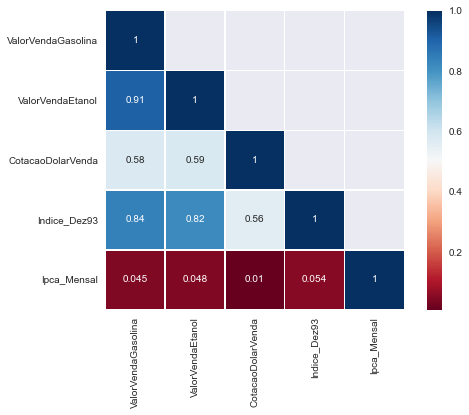

In [39]:
# Cálculo da correlação
corr = df_combustiveis_dolar_ipca_nacional.corr(method='kendall')
plot_corr(corr)

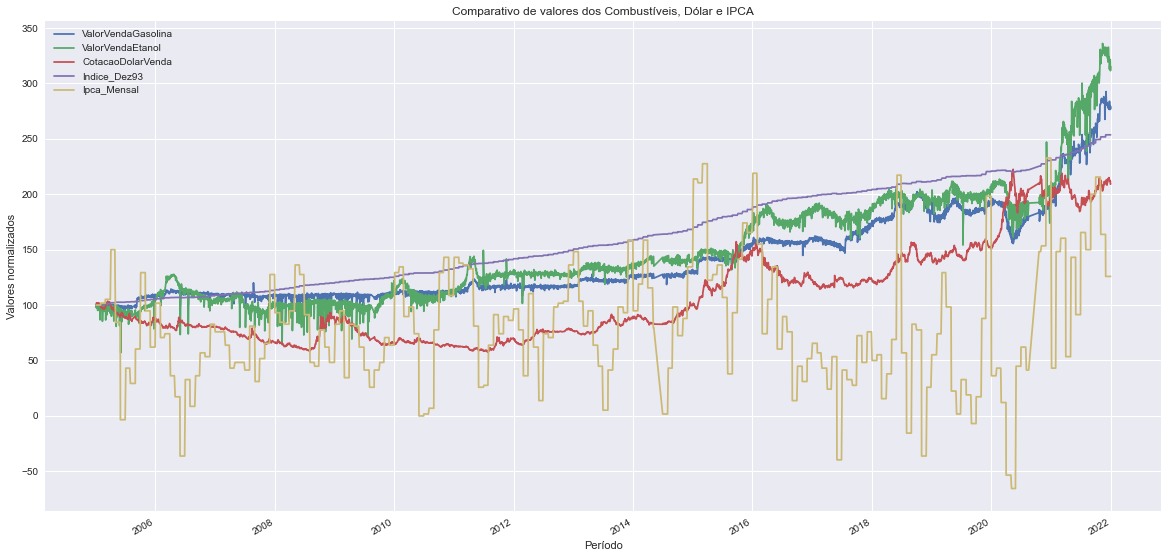

In [40]:
#Gráfico normalizado das séries   
(df_combustiveis_dolar_ipca_nacional/df_combustiveis_dolar_ipca_nacional.iloc[0]*100).plot(figsize=(20,10))
plt.ylabel('Valores normalizados')
plt.xlabel('Período')
plt.title('Comparativo de valores dos Combustíveis, Dólar e IPCA')
plt.show()

In [41]:
# Definição de parâmetros para os gráficos

plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (18, 13)
plt.rcParams['lines.linewidth'] = 1

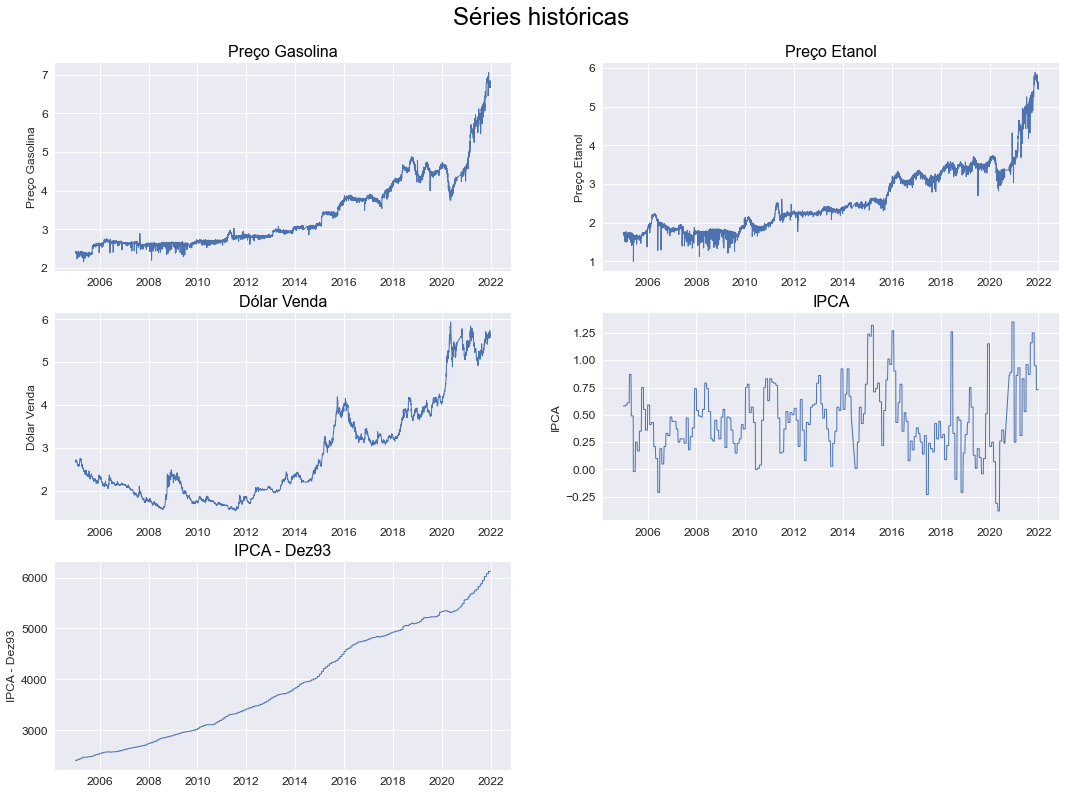

In [42]:
plt.rcParams['figure.figsize'] = (18, 13)

fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2)
fig.suptitle('Séries históricas', fontsize=24, y=0.94)

ax6.axis('off')

ax1.plot(df_combustiveis_dolar_ipca_nacional['ValorVendaGasolina'])
ax2.plot(df_combustiveis_dolar_ipca_nacional['ValorVendaEtanol'])
ax3.plot(df_combustiveis_dolar_ipca_nacional['CotacaoDolarVenda'])
ax4.plot(df_combustiveis_dolar_ipca_nacional['Ipca_Mensal'])
ax5.plot(df_combustiveis_dolar_ipca_nacional['Indice_Dez93'])

ax1.set_ylabel('Preço Gasolina')
ax2.set_ylabel('Preço Etanol')
ax3.set_ylabel('Dólar Venda')
ax4.set_ylabel('IPCA')
ax5.set_ylabel('IPCA - Dez93')

ax1.set_title('Preço Gasolina')
ax2.set_title('Preço Etanol')
ax3.set_title('Dólar Venda')
ax4.set_title('IPCA')
ax5.set_title('IPCA - Dez93')

ax1.grid(True, axis='both')
ax2.grid(True, axis='both')
ax3.grid(True, axis='both')
ax4.grid(True, axis='both')
ax5.grid(True, axis='both')


In [43]:
# GASOLINA

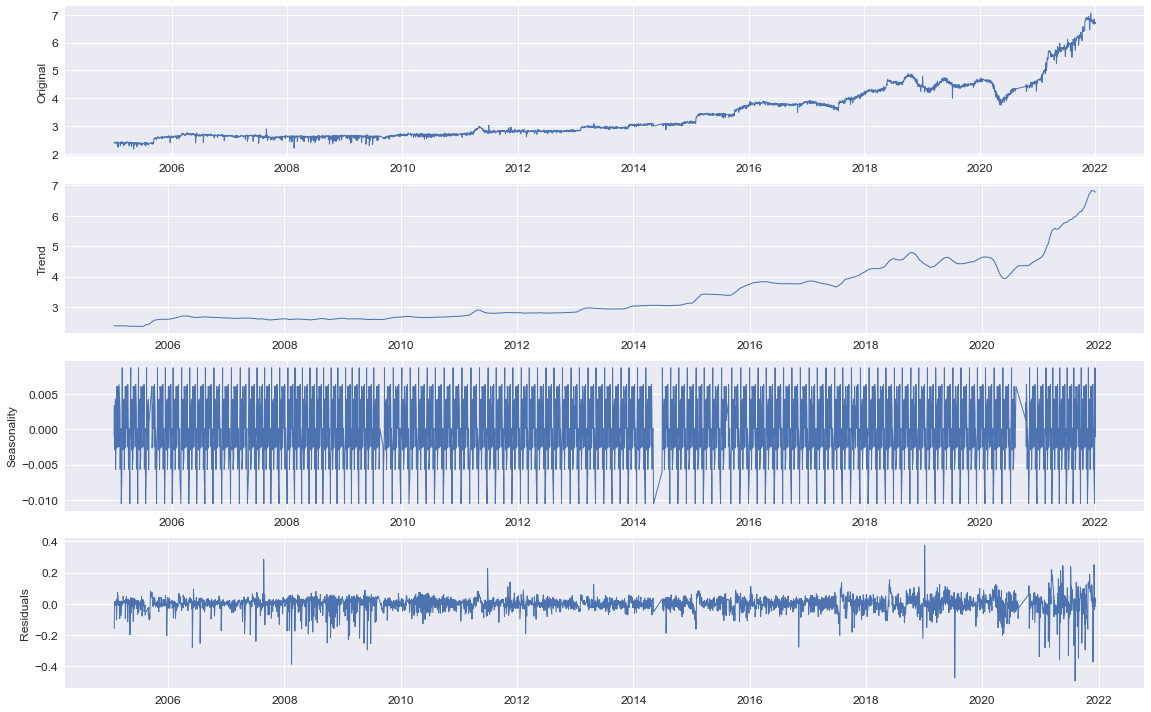

In [44]:
#Decomposição da série temporal
decomposition = seasonal_decompose(df_combustiveis_dolar_ipca_nacional['ValorVendaGasolina'], model='', period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(16,10))
plt.subplot(411)
plt.plot(df_combustiveis_dolar_ipca_nacional['ValorVendaGasolina'])
plt.ylabel('Original')
plt.subplot(412)
plt.plot(trend)
plt.ylabel('Trend')
plt.subplot(413)
plt.plot(seasonal)
plt.ylabel('Seasonality')
plt.subplot(414)
plt.plot(residual)
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

In [45]:
#Função para verificar a estacionariedade 
#Valor p mostra se série é estacionária ou não, abaixo de 0.05 é estacionária.

def adf_test(y):
    print('Resultado do Teste Dickey-Fuller:')
    dftest = adfuller(y, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=['Teste','Valor p', 'Nº de lags',
                                             'Nº de observações'])
    for key, value in dftest[4].items():
        dfoutput['Valor Crítico ({})'.format(key)] = value
    print(dfoutput)



In [46]:
adf_test(df_combustiveis_dolar_ipca_nacional['ValorVendaGasolina'])

Resultado do Teste Dickey-Fuller:
Teste                     1.948568
Valor p                   0.998602
Nº de lags               22.000000
Nº de observações      3488.000000
Valor Crítico (1%)       -3.432226
Valor Crítico (5%)       -2.862369
Valor Crítico (10%)      -2.567211
dtype: float64


In [47]:
# Como p é bem maior do que 0.05, é necessário fazer a diferenciação para ver se é estacionária

In [48]:
#Aplicação da diferenciação
df_combustiveis_dolar_ipca_nacional_gasolina_diff = df_combustiveis_dolar_ipca_nacional['ValorVendaGasolina'] - df_combustiveis_dolar_ipca_nacional['ValorVendaGasolina'].shift()
df_combustiveis_dolar_ipca_nacional_gasolina_diff.dropna(inplace=True)

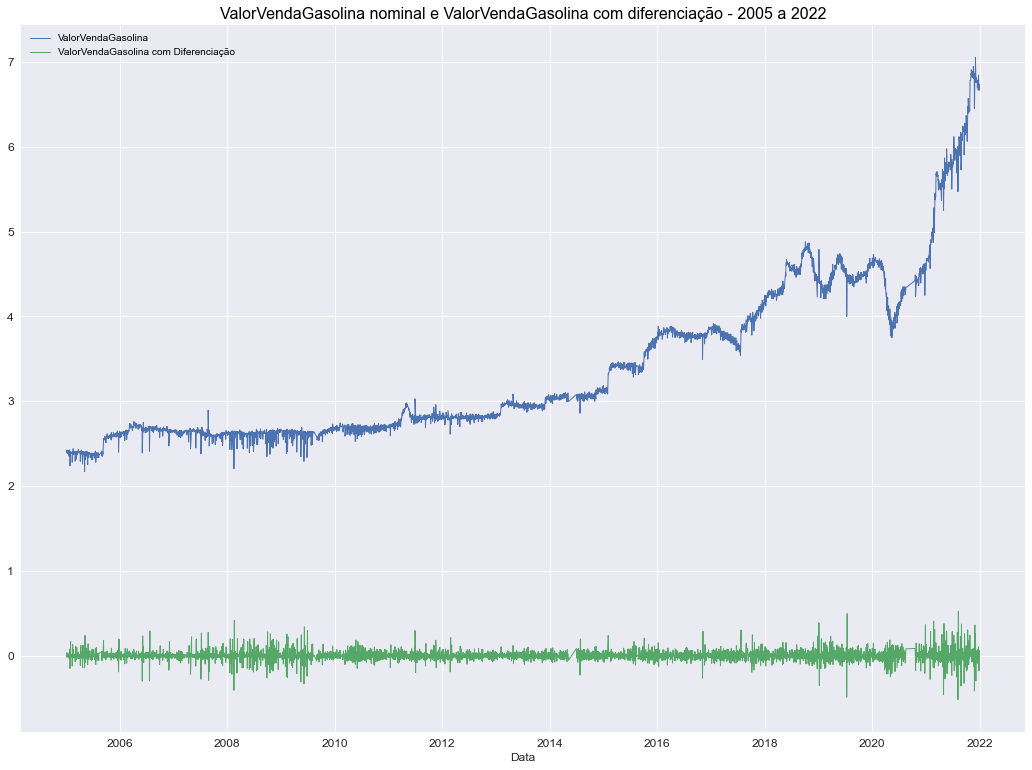

In [49]:
# Plot de ValorVendaGasolina e diferenciação

# Traça o gráfico
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (16,8)
plt.plot(df_combustiveis_dolar_ipca_nacional['ValorVendaGasolina'] , label = 'ValorVendaGasolina')#, linewidth=1)
plt.plot(df_combustiveis_dolar_ipca_nacional_gasolina_diff, label = 'ValorVendaGasolina com Diferenciação')
plt.legend()
ax.set_xlabel('Data')
ax.set_title('ValorVendaGasolina nominal e ValorVendaGasolina com diferenciação - 2005 a 2022')
ax.grid(True, axis='y')
plt.show();

In [50]:
adf_test(df_combustiveis_dolar_ipca_nacional_gasolina_diff)

Resultado do Teste Dickey-Fuller:
Teste                 -1.059382e+01
Valor p                6.425707e-19
Nº de lags             2.100000e+01
Nº de observações      3.488000e+03
Valor Crítico (1%)    -3.432226e+00
Valor Crítico (5%)    -2.862369e+00
Valor Crítico (10%)   -2.567211e+00
dtype: float64


In [51]:
# Como na diferenciação o valor p é em menor do que 0.05, verifica-se que a série diferenciada é estacionária

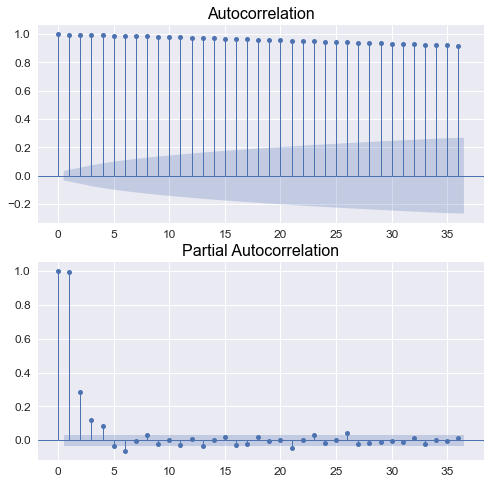

In [52]:
#Plotagem dos gráficos ACF e PACF para Gasolina
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))
plot_acf(df_combustiveis_dolar_ipca_nacional['ValorVendaGasolina'], ax = ax1)
plot_pacf(df_combustiveis_dolar_ipca_nacional['ValorVendaGasolina'], ax = ax2)

plt.show()

In [53]:
# SAZONALIDADE

In [54]:
df_sazonal = df_combustiveis_dolar_ipca_nacional[{'ValorVendaGasolina','ValorVendaEtanol'}].copy()

In [55]:
df_sazonal['ano'] = df_sazonal.index.year
df_sazonal['mes'] = df_sazonal.index.month

In [56]:
# SAZONALIDADE DA GASOLINA

In [57]:
df_sazonal_mes_gasolina = pd.DataFrame(df_sazonal.groupby(by=['ano','mes'])['ValorVendaGasolina'].mean())

In [58]:
df_sazonal_mes_gasolina = df_sazonal_mes_gasolina.reset_index(level=['mes','ano'])

In [59]:
df_pivot_gasolina = df_sazonal_mes_gasolina.pivot('mes','ano','ValorVendaGasolina')

In [60]:
df_pivot_gasolina

ano,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
mes,,,,,,,,,,,,,,,,,
1,2.390516,2.617708,2.643619,2.613560,2.622830,2.678309,2.706221,2.816005,2.839993,3.035866,3.124776,3.792326,3.857511,4.231165,4.389382,4.655498,4.699248
2,2.390196,2.624570,2.626695,2.587986,2.610834,2.702286,2.713178,2.804457,2.957468,3.043891,3.382256,3.812185,3.846981,4.270769,4.283232,4.629996,5.002388
3,2.382447,2.691399,2.637583,2.609538,2.618601,2.681871,2.755892,2.804980,2.972547,3.047611,3.424832,3.831132,3.791602,4.257204,4.384904,4.532491,5.564665
4,2.380778,2.715762,2.624851,2.601285,2.611949,2.661565,2.888817,2.799093,2.973091,3.064631,3.423478,3.835833,3.766093,4.298632,4.520854,4.132733,5.531988
5,2.363387,2.701657,2.651005,2.588528,2.605715,2.658729,2.905923,2.818372,2.954115,3.053352,3.414365,3.805011,3.731410,4.434897,4.653839,3.889059,5.706678
6,2.368518,2.653436,2.634712,2.585797,2.587773,2.657839,2.811421,2.811206,2.946719,NaN,3.407496,3.777532,3.681252,4.595475,4.592664,4.029763,5.781482
7,2.369928,2.662239,2.611975,2.601159,2.597573,2.659423,2.793531,2.801509,2.937577,3.046456,3.397147,3.763972,3.683104,4.559021,4.447842,4.218500,5.917699
8,2.375744,2.677960,2.611606,2.619725,2.624185,2.670466,2.800629,2.808052,2.939599,3.051601,3.390322,3.770086,3.873075,4.538121,4.422140,4.312280,6.001872
9,2.507423,2.666518,2.578831,2.612273,2.586447,2.671171,2.808196,2.809830,2.937608,3.059276,3.389557,3.763556,3.967012,4.706243,4.438089,NaN,6.173260


In [61]:
# Convém observar que não houve coletas de dados em 06/2014 e 09/2020, por isto esses valores estão nulos

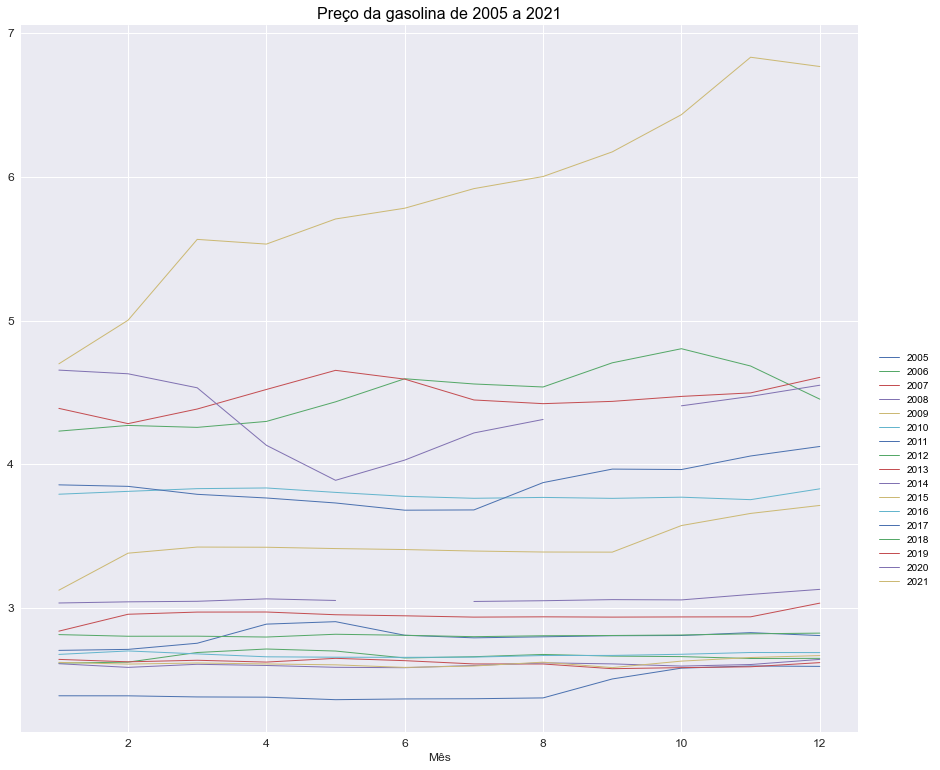

In [62]:
# Verificar comportamento sazonal de cada ano
plt.rcParams['figure.figsize'] = (15, 13)

fig, ax = plt.subplots()
plt.plot(df_pivot_gasolina)
plt.legend(df_pivot_gasolina.columns, loc=(1.02,0.2))
plt.xlabel('Mês')
ax.set_title('Preço da gasolina de 2005 a 2021')
ax.grid(True, axis='both')
plt.show();

In [63]:
# ETANOL

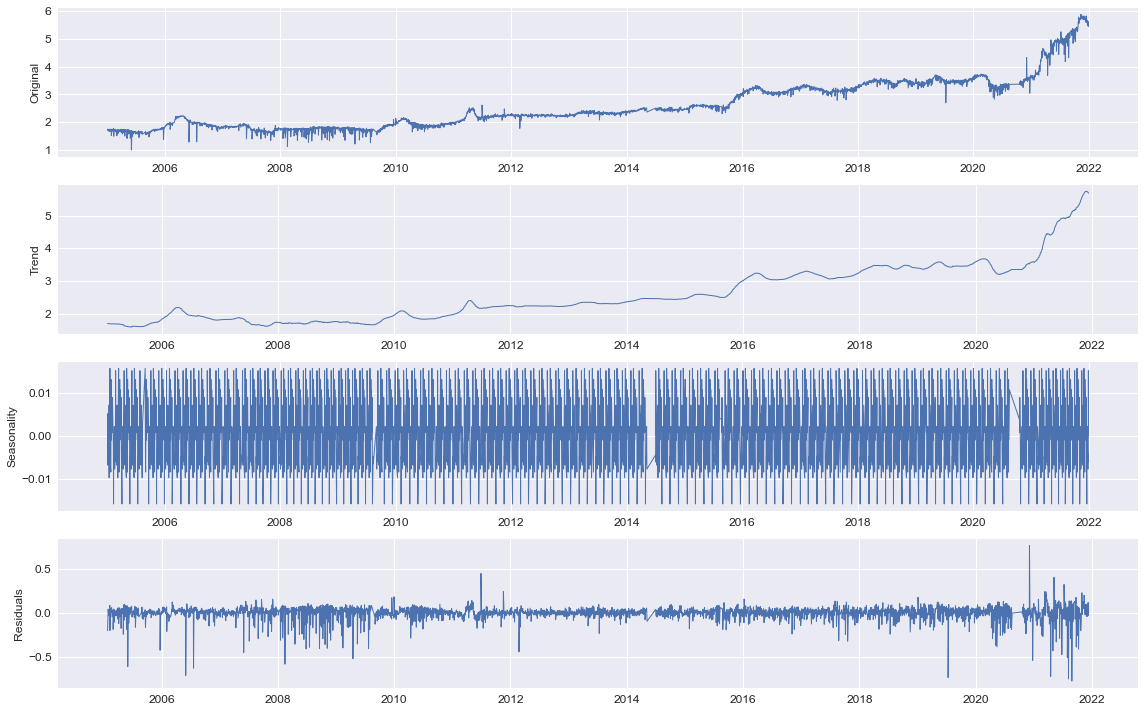

In [64]:
#Decomposição da série temporal
decomposition = seasonal_decompose(df_combustiveis_dolar_ipca_nacional['ValorVendaEtanol'], model='', period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(16,10))
plt.subplot(411)
plt.plot(df_combustiveis_dolar_ipca_nacional['ValorVendaEtanol'])
plt.ylabel('Original')
plt.subplot(412)
plt.plot(trend)
plt.ylabel('Trend')
plt.subplot(413)
plt.plot(seasonal)
plt.ylabel('Seasonality')
plt.subplot(414)
plt.plot(residual)
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

In [65]:
adf_test(df_combustiveis_dolar_ipca_nacional['ValorVendaEtanol'])

Resultado do Teste Dickey-Fuller:
Teste                     1.685098
Valor p                   0.998092
Nº de lags               26.000000
Nº de observações      3484.000000
Valor Crítico (1%)       -3.432228
Valor Crítico (5%)       -2.862370
Valor Crítico (10%)      -2.567212
dtype: float64


In [66]:
# Como p é bem maior do que 0.05, é necessário fazer a diferenciação para ver se é estacionária

In [67]:
#Aplicação da diferenciação
df_combustiveis_dolar_ipca_nacional_etanol_diff = df_combustiveis_dolar_ipca_nacional['ValorVendaEtanol'] - df_combustiveis_dolar_ipca_nacional['ValorVendaEtanol'].shift()
df_combustiveis_dolar_ipca_nacional_etanol_diff.dropna(inplace=True)

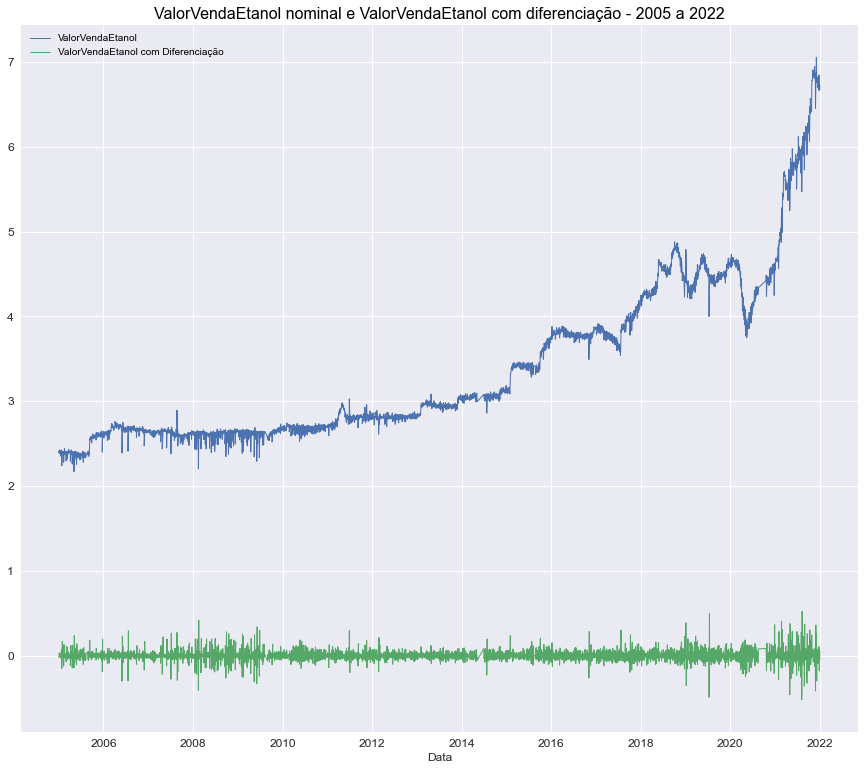

In [68]:
# Plot de ValorVendaGasolina e diferenciação

# Traça o gráfico
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (16,8)
plt.plot(df_combustiveis_dolar_ipca_nacional['ValorVendaGasolina'] , label = 'ValorVendaEtanol')#, linewidth=1)
plt.plot(df_combustiveis_dolar_ipca_nacional_gasolina_diff, label = 'ValorVendaEtanol com Diferenciação')
plt.legend()
ax.set_xlabel('Data')
ax.set_title('ValorVendaEtanol nominal e ValorVendaEtanol com diferenciação - 2005 a 2022')
ax.grid(True, axis='y')
plt.show();

In [69]:
adf_test(df_combustiveis_dolar_ipca_nacional_etanol_diff)

Resultado do Teste Dickey-Fuller:
Teste                 -1.091221e+01
Valor p                1.089764e-19
Nº de lags             2.500000e+01
Nº de observações      3.484000e+03
Valor Crítico (1%)    -3.432228e+00
Valor Crítico (5%)    -2.862370e+00
Valor Crítico (10%)   -2.567212e+00
dtype: float64


In [70]:
# Como na diferenciação o valor p é em menor do que 0.05, verifica-se que a série diferenciada é estacionária

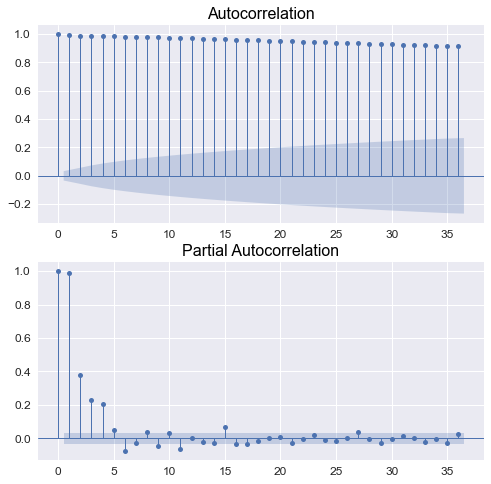

In [71]:
#Plotagem dos gráficos ACF e PACF para Etanol
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))
plot_acf(df_combustiveis_dolar_ipca_nacional['ValorVendaEtanol'], ax = ax1)
plot_pacf(df_combustiveis_dolar_ipca_nacional['ValorVendaEtanol'], ax = ax2)

plt.show()

In [72]:
# SAZONALIDADE DO ETANOL

In [73]:
df_sazonal_mes_etanol = pd.DataFrame(df_sazonal.groupby(by=['ano','mes'])['ValorVendaEtanol'].mean())

In [74]:
df_sazonal_mes_etanol = df_sazonal_mes_etanol.reset_index(level=['mes','ano'])

In [75]:
df_pivot_etanol = df_sazonal_mes_etanol.pivot('mes','ano','ValorVendaEtanol')

In [76]:
df_pivot_etanol

ano,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
mes,,,,,,,,,,,,,,,,,
1,1.714981,1.905079,1.834310,1.738169,1.751513,2.003976,1.995106,2.249740,2.258741,2.380812,2.467200,3.073284,3.295780,3.311817,3.398903,3.635614,3.631683
2,1.706148,1.940790,1.829368,1.700572,1.743321,2.110043,2.043056,2.213465,2.299325,2.403137,2.566145,3.152929,3.305040,3.390843,3.348429,3.684496,3.810208
3,1.689955,2.134832,1.831634,1.718705,1.756478,2.054856,2.193848,2.236506,2.346456,2.441175,2.599316,3.234879,3.242806,3.437207,3.444212,3.661560,4.446842
4,1.688101,2.215318,1.862969,1.715588,1.714616,1.912309,2.437709,2.238486,2.360040,2.478011,2.600700,3.247494,3.198876,3.510918,3.519637,3.395336,4.345247
5,1.655124,2.114538,1.895604,1.719648,1.720112,1.883590,2.330805,2.246173,2.354267,2.466900,2.584480,3.115822,3.149255,3.452338,3.611306,3.199426,4.688733
6,1.594874,1.956559,1.792304,1.687514,1.691950,1.847490,2.176242,2.247578,2.339618,NaN,2.555652,3.051855,3.082275,3.483532,3.524944,3.222175,4.887941
7,1.621684,1.933549,1.694178,1.738328,1.667874,1.832493,2.160007,2.241473,2.310780,2.468072,2.536639,3.037311,3.061230,3.441501,3.421319,3.287739,4.934662
8,1.624602,1.947375,1.657877,1.769946,1.718431,1.855514,2.198154,2.238719,2.319927,2.452770,2.510505,3.044106,3.105809,3.346351,3.458296,3.306763,4.982860
9,1.607431,1.924019,1.656459,1.778911,1.679222,1.851850,2.224668,2.246136,2.315931,2.452669,2.497841,3.060866,3.122487,3.422887,3.459290,NaN,5.230268


In [77]:
# Convém observar que não houve coletas de dados em 06/2014 e 09/2020, por isto esses valores estão nulos

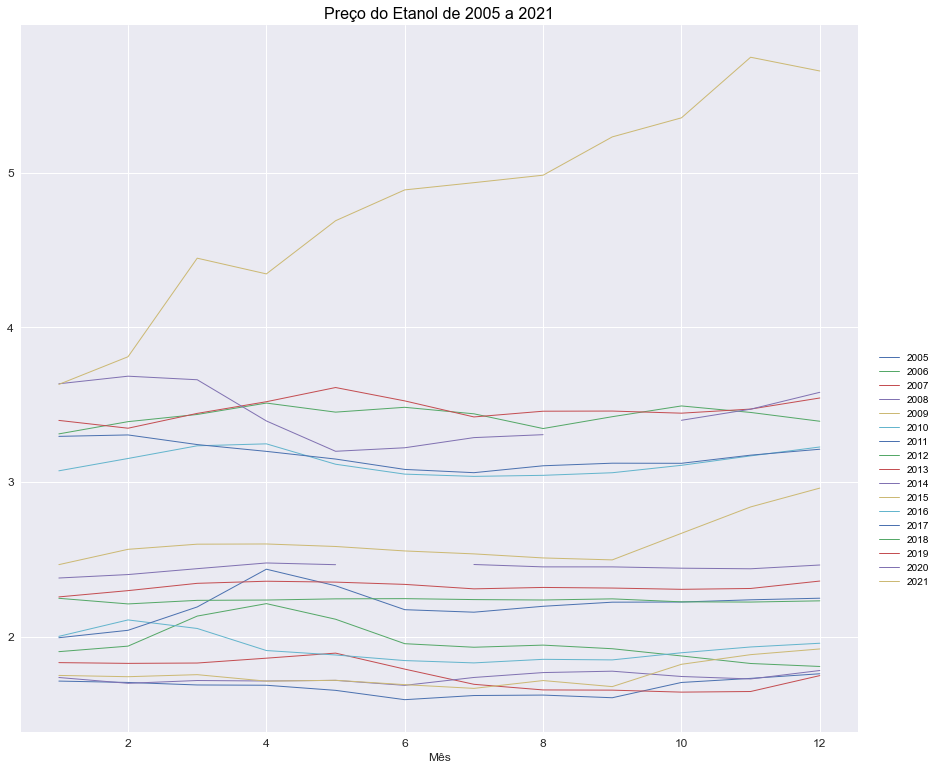

In [78]:
# Verificar comportamento sazonal de cada ano
plt.rcParams['figure.figsize'] = (15, 13)

fig, ax = plt.subplots()
plt.plot(df_pivot_etanol)
plt.legend(df_pivot_etanol.columns, loc=(1.02,0.2))
plt.xlabel('Mês')
ax.set_title('Preço do Etanol de 2005 a 2021')
ax.grid(True, axis='both')
plt.show();
